# Python and Scientific Computation

---

## 1. Python Basics


Python Language Features

1. Open Source
2. Cross-Platform
3. Scalability
4. Limited Speed

### 1.1 [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_sequence "The Fibonacci sequence starts with 0 and 1, and subsequent Fibonacci numbers are obtained by adding the previous two numbers.")

In [1]:
def fibonacci(n):
    if n==1 or n==2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [2]:
fibonacci(21)

10946

### 1.2 String Reversal

In [3]:
def rev_strs(strs):
    strs.reverse()
    reversed_strs = []
    for string in strs:
        rev_str = string[::-1]
        reversed_strs.append(rev_str)
    return reversed_strs

In [4]:
strs = ['computational', 'materials', 'science']
rev_strs(strs)

['ecneics', 'slairetam', 'lanoitatupmoc']

### 1.3 Factorization

In [5]:
def factorization(num):
    factor = []
    while num > 1:
        for i in range(num - 1):
            k = i + 2
            if num % k == 0:
                factor.append(k)
                num = int(num / k)
                break

    return factor

In [6]:
factorization(2001)

[3, 23, 29]

## 2. Python Modules

- **NumPy - Scientific Computing**
- **Matplotlib - Scientific Plotting**

### 2.1 Numpy array operations

In [7]:
import numpy as np

a = np.random.randint(0, 100, size=(5, 5))

b = a.copy()

b[b < 30] = 30
b[b > 70] = 70

print(a)
print(b)

[[29 95 69 90 69]
 [14 69 19 68 21]
 [49 15 62 62  6]
 [68 21 76 51 40]
 [13 31 62 19 25]]
[[30 70 69 70 69]
 [30 69 30 68 30]
 [49 30 62 62 30]
 [68 30 70 51 40]
 [30 31 62 30 30]]


### 2.2 Visualization of the ideal gas equation of state

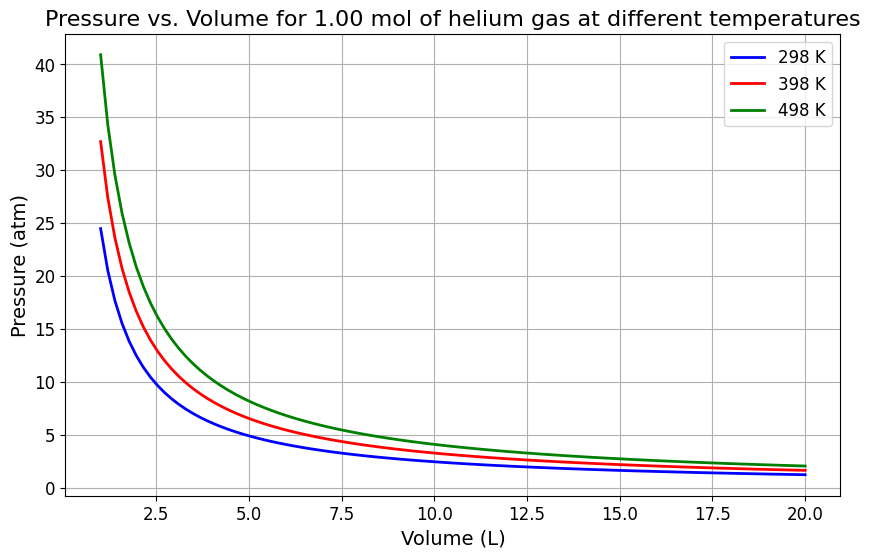

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Defining constants
R = 0.08206  # L·atm/mol·K
n = 1.00  # mol
T1 = 298  # K
T2 = 398  # K
T3 = 498  # K

# Volume sampling
V = np.linspace(1, 20, 100)  # Generates equally spaced sampling points for the volume

# Calculate pressure using the ideal gas state equation PV = nRT
P1 = n * R * T1 / V  # Pressure at 298K
P2 = n * R * T2 / V  # Pressure at 398K
P3 = n * R * T3 / V  # Pressure at 498K

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(V, P1, 'b-', linewidth=2, label='298 K')  # Draw the curve at 298K
plt.plot(V, P2, 'r-', linewidth=2, label='398 K')  # Draw the curve at 398K
plt.plot(V, P3, 'g-', linewidth=2, label='498 K')  # Draw the curve at 498K
plt.title('Pressure vs. Volume for 1.00 mol of helium gas at different temperatures', fontsize=16)
plt.xlabel('Volume (L)', fontsize=14)
plt.ylabel('Pressure (atm)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

## 3. Python Comprehensive Exercises

### 3.1 Pie Chart - Visualizing the Composition of Earth's Atmosphere

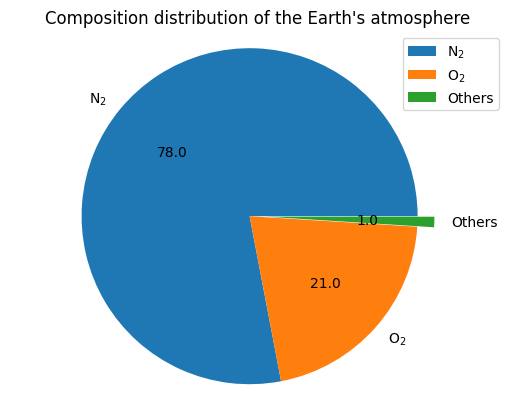

In [9]:
import matplotlib.pyplot as plt

labels = [r'$\mathregular{N_2}$', r'$\mathregular{O_2}$', 'Others']
percents = (78, 21, 1)
explode = (0, 0, 0.1)

plt.title("Composition distribution of the Earth's atmosphere")
plt.pie(percents, labels=labels, explode=explode, autopct='%1.1f')
plt.axis('equal')

plt.legend(loc='best')
plt.show()

### 3.2 Histogram

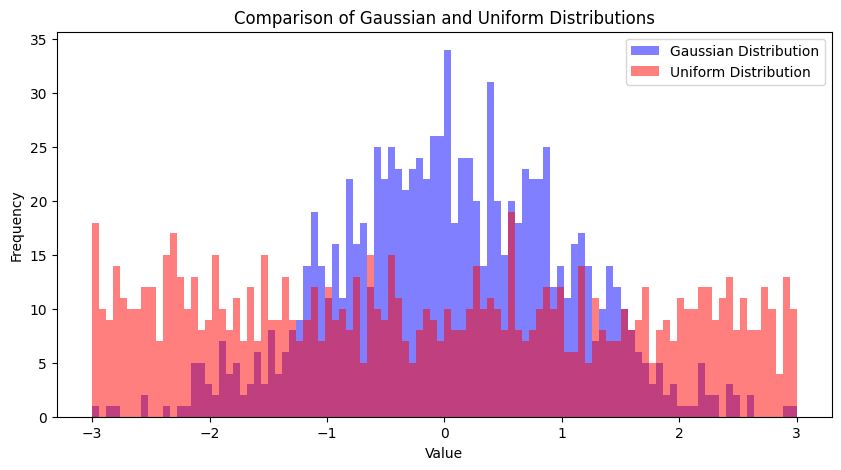

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generates random values from a Gaussian distribution
mean = 0  # mean
std_dev = 1  # Standard deviation
gaussian_values = np.random.normal(mean, std_dev, 1000)

# Generate uniformly distributed random values
random_values = np.random.uniform(-3, 3, 1000)

# Create a histogram
plt.figure(figsize=(10, 5))
plt.hist(gaussian_values, bins=100, alpha=0.5, color='b', label='Gaussian Distribution', range=(-3, 3))
plt.hist(random_values, bins=100, alpha=0.5, color='r', label='Uniform Distribution', range=(-3, 3))

plt.title('Comparison of Gaussian and Uniform Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

### 3.3 Electrochemical Reaction Step Diagram

Free energy of each step in the binding and splitting of $H_2$(g) by nickel phosphine catalyst

| Step | Relative Free Energy (kcal/mol) |
|:----:|:-------------------------------:|
|  1   | 0.0                             |
|  2   | 11.6                            |
|  3   | 9.8                             |
|  4   | 13.4                            |
|  5   | 5.8                             |
|  6   | 8.3                             |
|  7   | 2.7                             |


Data Source：[*Inorg. Chem.* **2016**, 55, 445−460](https://doi.org/10.1021/acs.inorgchem.5b02262)

Note: The following code refers to [**Rapid drawing of chemical reaction step diagrams**](https://nb.bohrium.dp.tech/detail/4934994790) and [**Python script extracts data and draws electrochemical step diagrams**](https://jonyafei.github.io/2021/06/20/python%E8%84%9A%E6%9C%AC%E6%8F%90%E5%8F%96%E6%95%B0%E6%8D%AE%E7%BB%98%E5%88%B6%E7%94%B5%E5%8C%96%E5%AD%A6%E5%8F%B0%E9%98%B6%E5%9B%BE/)

In [11]:
import copy

import numpy as np
import matplotlib.pyplot as plt

from cycler import cycler
from dataclasses import dataclass
from typing import List, Optional
from pathlib import Path

In [12]:
@dataclass
class StepsGraph:
    data: list
    legend_txt: str = None
    labels: List[str] = None

    def __post_init__(self):
        if self.labels:
            if len(self.data) != len(self.labels):
                raise ValueError("The lengths of data and labels must be equal.")

    def plot_line_dot(
            self,
            ax: plt.Axes,
            color: Optional[str] = None,
            path_label: str = None,
            energy_label: bool = False, energy_label_fontsize=18,
            step_label: List[str] = None, step_label_fontsize=12,
    ):
        y = list(self.data)
        y_max, y_min = np.max(y), np.min(y)
        y_bias = (y_max - y_min) / 25 if y_max != y_min else 0.05

        x = range(len(y))
        if path_label is None:
            path_label = self.legend_txt
        if step_label is None:
            step_label = self.labels
        y_new = []
        x_new = []

        for j in range(len(y)):
            y_new.append(y[j])
            y_new.append(y[j])
            x_new.append(2 * j)
            x_new.append(2 * j + 1)

        if color is None:
            color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
            color = color_cycle[len(ax.lines) % len(color_cycle)]

        ax.plot(x_new, y_new, linestyle='--', linewidth=2, color=color,
                )


        k = 0
        while k < len(y_new):
            x_line = [x_new[k], x_new[k + 1]]
            y_line = [y_new[k], y_new[k + 1]]
            ax.plot(x_line, y_line, linestyle='-', linewidth=4, color=color, label=path_label if k == 0 else None)
            k += 2

        if energy_label:
            for j in range(len(x)):
                ax.text(x[j] * 2 + 0.5, y[j] + y_bias, "{:.2f}".format(y[j]), fontsize=energy_label_fontsize,
                        color=color, horizontalalignment='center')

        now_minx, now_maxx = ax.get_xlim()
        now_miny, now_maxy = ax.get_ylim()
        if step_label:
            for j in range(len(x)):
                ax.text(
                    (x[j] * 2 + 0.5 - now_minx) / (now_maxx - now_minx),
                    0,
                    step_label[j],
                    fontsize=step_label_fontsize,
                    color=color,
                    horizontalalignment='center',
                    verticalalignment='top',
                    transform=ax.transAxes
                )
        ax.set_xticks([])
        ax.set_xticklabels([])

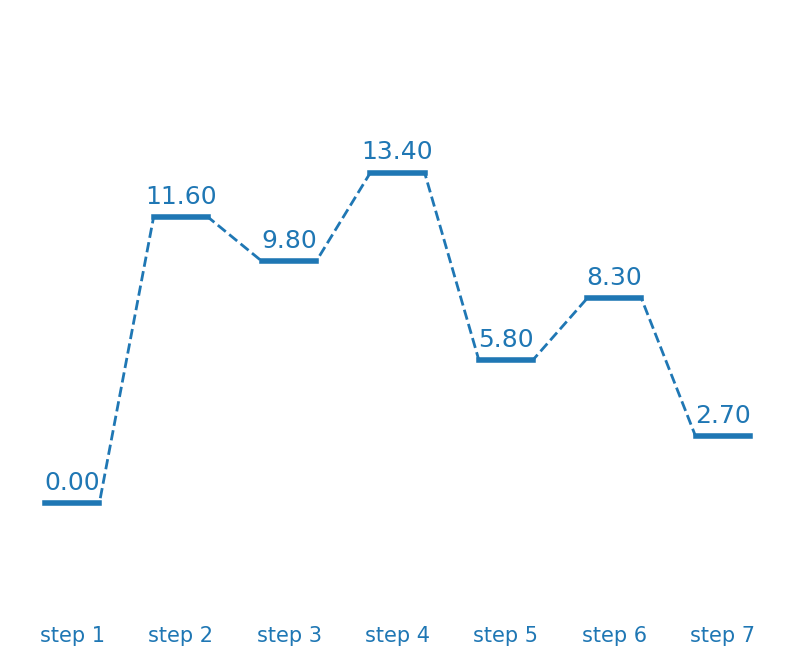

In [13]:
figure = plt.figure(figsize=(10, 8), dpi=100)
ax = figure.add_subplot(111)
cmap = plt.get_cmap('tab20')
ax.set_prop_cycle(cycler('color', cmap.colors))

labels = ["step 1", "step 2", "step 3", "step 4", "step 5", "step 6", "step 7"]
energy = [0.0, 11.6, 9.8, 13.4, 5.8, 8.3, 2.7]
stepgraph_ins1 = StepsGraph(data=energy, labels=labels)
stepgraph_ins1.plot_line_dot(ax, energy_label=True, step_label_fontsize=15)
# ax.legend(fontsize=14)
ax.set_ylim(-5, 20)
ax.axis('off')

plt.show()